In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words("english"))

In [3]:
import csv
data = [
    (0, "This movie was terrible."),
    (0, "I did not like the product at all."),
    (0, "The political situation is worrisome."),
    (0, "The service was awful."),
    (0, "I strongly disagree with the decision."),
    (1, "I loved the performance in the movie."),
    (1, "The product exceeded my expectations."),
    (1, "The political speech was inspiring."),
    (1, "The customer service was excellent."),
    (1, "I fully support their decision."),
]
csv_filename = "sentiment_dataset.csv"
with open(csv_filename, "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Sentiment", "Text"])  # Header row
    csvwriter.writerows(data)
print(f"Dataset saved as {csv_filename}")

Dataset saved as sentiment_dataset.csv


In [4]:
csv_filename = "sentiment_dataset.csv"
labels = []
text_data = []
with open(csv_filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)
    for row in csvreader:
        sentiment_label, text = row
        labels.append(int(sentiment_label))
        text_data.append(text)

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)
max_sequence_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding="post", truncating="post")

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)

In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [13]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_sequence_length))
model.add(SimpleRNN(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 34113 (133.25 KB)
Trainable params: 34113 (133.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6877 - accuracy: 0.6000 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 130ms/step - loss: 0.6865 - accuracy: 0.6000 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 125ms/step - loss: 0.6853 - accuracy: 0.6000 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 137ms/step - loss: 0.6841 - accuracy: 0.6000 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 115ms/step - loss: 0.6829 - accuracy: 0.6000 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 130ms/step - loss: 0.6817 - accuracy: 0.6000 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 115ms/step - loss: 0.6804 - accuracy: 0.6000 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=======

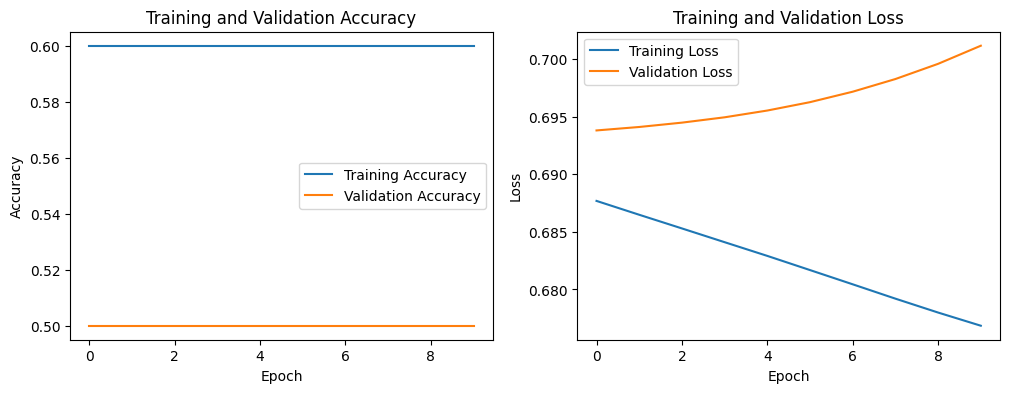

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [16]:
sample_text = "I really enjoyed the movie very much, it was so fantastic!"
sample_sequence = tokenizer.texts_to_sequences([sample_text])
sample_padded_sequence = pad_sequences(sample_sequence, maxlen=max_sequence_length, padding="post", truncating="post")
sentiment_prob = model.predict(sample_padded_sequence)
if sentiment_prob >= 0.4:
    sentiment_label = "Positive"
else:
    sentiment_label = "Negative"

1/1 [==============================] - 0s 153ms/step


In [17]:
print(f"Sample Text: {sample_text}")
print(f"Sentiment Prediction: {sentiment_label} (Probability: {sentiment_prob[0][0]})")

Sample Text: I really enjoyed the movie very much, it was so fantastic!
Sentiment Prediction: Positive (Probability: 0.4368876814842224)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

In [19]:
rnn_layer_sizes = [128, 256, 512]
model_histories = {}

In [20]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
for rnn_size in rnn_layer_sizes:
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
    model.add(SimpleRNN(rnn_size, return_sequences=True))
    model.add(SimpleRNN(rnn_size))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=0)
    model_histories[f'SimpleRNN_{rnn_size}'] = history

In [23]:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=0)
model_histories[f'SimpleRNN_{rnn_size}'] = history

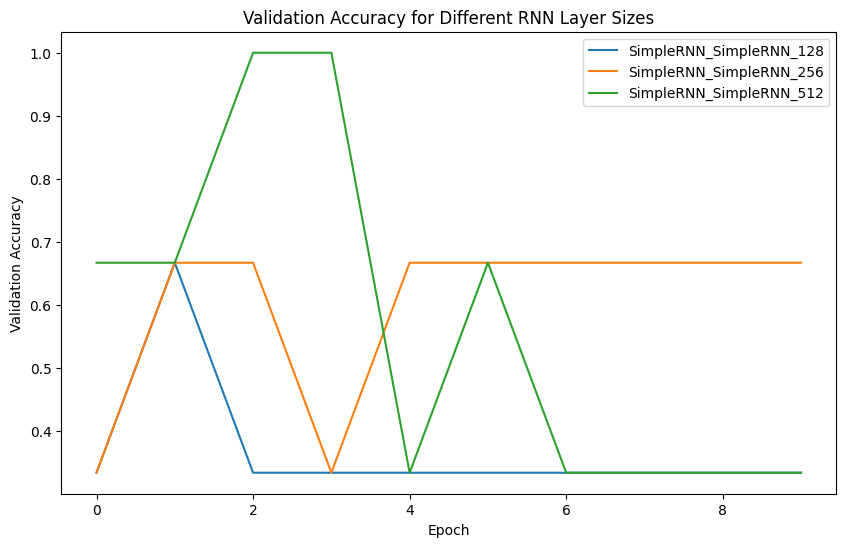

In [24]:
plt.figure(figsize=(10, 6))
for rnn_size, history in model_histories.items():
    plt.plot(history.history['val_accuracy'], label=f'SimpleRNN_{rnn_size}')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy for Different RNN Layer Sizes')
plt.show()